# Dependency setup

## Package setup

In [2]:
# Import dependencies and libraries
from IPython.display import clear_output
import pandas as pd
from dotenv import load_dotenv
import sys
import os
import time
import matplotlib.pyplot as plt
import numpy as np

# Load development mode
try:
  dev = os.getenv("DEV_MODE")
  if dev: print("Development mode loaded successfully!")
except:
  print("Error loading development mode")
  print("Defaulting to production mode")
  dev = False

# Load environment variables and U.S. Census API key
if dev: print("Loading environment variables...")
load_dotenv()
if dev: print("Environment variables loaded successfully!")
try:
  if dev: print("Loading U.S. Census API key...")
  api_key = os.getenv("CENSUS_API_KEY")
  if dev: print("API key loaded successfully!")
except:
  print("Error loading U.S. Census API key")
  print("Please check your environment variables")
  

## Census Data

#### Loading Cleaned Census Data from CSV

In [11]:
# Load the final census data from the CSV file
try:
  if dev: print("Loading final census data from the CSV file...")
  census_df = pd.read_csv("data/census/clean_census_data.csv")
  if dev: display(census_df.head())
  print("Final census data loaded from file successfully!")
except:
  print("Error loading final census data from file, please make sure the file exists.")


Final census data loaded from file successfully!


# HIC Data

In [16]:
# Import HIC data into a DataFrame
if dev: print("Loading HIC data...")
raw_hic_data_df = pd.read_excel("data/hic/HIC_CO_2007-2023.xlsx")

print("HIC data loaded successfully!")


HIC data loaded successfully!


In [17]:
# Display the first and last 30 rows of the DataFrame
print("HIC data:")
display(raw_hic_data_df.head(30))
display(raw_hic_data_df.tail(30))


HIC data:


,Year,State,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)",...,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
0,2007,CO,6414,5735,3597,0.6270,2780,3634,1235,3584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,CO,6522,5712,4374,0.7660,2744,3753,25,1217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,CO,6363,5532,4707,0.8510,2729,3609,25,1206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,CO,6420,5625,4930,0.8760,2591,3804,25,1223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,CO,6361,5620,4944,0.8800,2619,3717,25,1262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012,CO,6536,5960,5444,0.9130,2495,4016,25,1193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2013,CO,7744,7028,6022,0.8570,3153,4358,208,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014,CO,8466,7625,5861,0.6923,3753,4688,25,1295,...,820.0,2271.0,0.0,10.0000,10.0,0.0,0.0,1.0,10.0,0.0
8,2015,CO,7653,6834,5168,0.6753,3263,4365,25,1136,...,853.0,2481.0,0.0,10.0000,10.0,0.0,0.0,1.0,10.0,0.0
9,2016,CO,7656,6834,4310,0.5630,3541,4048,67,1068,...,1089.0,2886.0,0.0,54.0000,54.0,54.0,1.0,0.0,0.0,54.0


,Year,State,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)",...,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
0,2007,CO,6414,5735,3597,0.6270,2780,3634,1235,3584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,CO,6522,5712,4374,0.7660,2744,3753,25,1217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,CO,6363,5532,4707,0.8510,2729,3609,25,1206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,CO,6420,5625,4930,0.8760,2591,3804,25,1223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,CO,6361,5620,4944,0.8800,2619,3717,25,1262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012,CO,6536,5960,5444,0.9130,2495,4016,25,1193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2013,CO,7744,7028,6022,0.8570,3153,4358,208,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014,CO,8466,7625,5861,0.6923,3753,4688,25,1295,...,820.0,2271.0,0.0,10.0000,10.0,0.0,0.0,1.0,10.0,0.0
8,2015,CO,7653,6834,5168,0.6753,3263,4365,25,1136,...,853.0,2481.0,0.0,10.0000,10.0,0.0,0.0,1.0,10.0,0.0
9,2016,CO,7656,6834,4310,0.5630,3541,4048,67,1068,...,1089.0,2886.0,0.0,54.0000,54.0,54.0,1.0,0.0,0.0,54.0


# PIT Data

In [18]:
# Import PIT data into a DataFrame
if dev: print("Loading PIT data...")
raw_pit_data_df = pd.read_excel("data/pit/PIT_CO_2007-2023.xlsx")

print("PIT data loaded successfully!")


PIT data loaded successfully!


In [19]:
# Display the first and last 30 rows of the DataFrame
print("PIT data:")
display(raw_pit_data_df.head(30))
display(raw_pit_data_df.tail(30))


PIT data:


,Year,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Unnamed: 634,Unnamed: 635,Unnamed: 636,Unnamed: 637,Unnamed: 638,Unnamed: 639,Unnamed: 640,Unnamed: 641,Unnamed: 642,Unnamed: 643
0,2007,CO,3,14225,3630,3341,6971,7254,6844,2158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,CO,3,14747,3492,3385,6877,7870,6260,2104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,CO,3,15268,4895,4136,9031,6237,7401,3083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,CO,3,15482,4895,4136,0,9031,6451,7574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,CO,3,15116,2979,3142,25,6146,8970,4546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012,CO,3,16768,3502,3733,25,7260,9508,5101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2013,CO,3,9754,2710,1066,5978,4025,785,419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014,CO,3,10028,2835,1004,6189,3701,5284,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,CO,3,9953,2528,808,6617,3923,6012,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016,CO,3,10550,2327,983,7240,4103,6393,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Year,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Unnamed: 634,Unnamed: 635,Unnamed: 636,Unnamed: 637,Unnamed: 638,Unnamed: 639,Unnamed: 640,Unnamed: 641,Unnamed: 642,Unnamed: 643
0,2007,CO,3,14225,3630,3341,6971,7254,6844,2158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,CO,3,14747,3492,3385,6877,7870,6260,2104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,CO,3,15268,4895,4136,9031,6237,7401,3083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,CO,3,15482,4895,4136,0,9031,6451,7574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,CO,3,15116,2979,3142,25,6146,8970,4546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012,CO,3,16768,3502,3733,25,7260,9508,5101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2013,CO,3,9754,2710,1066,5978,4025,785,419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014,CO,3,10028,2835,1004,6189,3701,5284,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,CO,3,9953,2528,808,6617,3923,6012,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016,CO,3,10550,2327,983,7240,4103,6393,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# SNAP Data

In [20]:
# Import SNAP data into a DataFrame
if dev: print("Loading SNAP data...")
raw_snap_data_df = pd.read_csv("data/snap/SNAP_CO_2010-2022.csv")

print("SNAP data loaded successfully!")


SNAP data loaded successfully!


In [21]:
# Display the first and last 30 rows of the DataFrame
print("SNAP data:")
display(raw_snap_data_df.head(30))
display(raw_snap_data_df.tail(30))


SNAP data:


,Date,Recipients
0,1/1/10,395580
1,2/1/10,398862
2,3/1/10,407731
3,4/1/10,411245
4,5/1/10,413805
5,6/1/10,417989
6,7/1/10,419737
7,8/1/10,424314
8,9/1/10,424878
9,10/1/10,428941


,Date,Recipients
120,1/1/20,434142
121,2/1/20,431397
122,3/1/20,439355
123,4/1/20,507074
124,5/1/20,524084
125,6/1/20,539331
126,7/1/20,551936
127,8/1/20,534175
128,9/1/20,523098
129,10/1/20,506102


# SSS Data

In [22]:
# Import SSS data into a DataFrame
if dev: print("Loading SSS data...")
raw_sss_data_df = pd.read_excel("data/sss/SSS_CO_2011-2022.xlsx")
raw_sss_data_df['2 Adults + 2 School Age'] = raw_sss_data_df['2 Adults + 2 School Age'].astype(int)

print("SSS data loaded successfully!")


SSS data loaded successfully!


In [23]:
# Display the first and last 30 rows of the DataFrame
print("SSS data:")
display(raw_sss_data_df.head(30))
display(raw_sss_data_df.tail(30))


SSS data:


,County,Year,1 Adult,2 Adults + 2 School Age
0,Adams County,2011,23143.618470,54683
1,Alamosa County,2011,17991.556333,44930
2,Arapahoe County,2011,22935.965145,54018
3,Archuleta County,2011,19683.058172,45248
4,Baca County,2011,17966.272969,40120
5,Bent County,2011,17258.320770,41434
6,Boulder County,2011,24526.616885,58370
7,Broomfield County,2011,25395.653103,56158
8,Chaffee County,2011,18435.201207,41630
9,Cheyenne County,2011,17110.745264,37940


,County,Year,1 Adult,2 Adults + 2 School Age
226,Lake County,2022,30028.79,80699
227,Larimer County,2022,35116.46,83979
228,Las Animas County,2022,27476.42,67246
229,Lincoln County,2022,28870.85,69680
230,Logan County,2022,26943.36,70309
231,Mesa County,2022,27900.70,68055
232,Mineral County,2022,31239.24,72633
233,Moffat County,2022,28600.63,80309
234,Montezuma County,2022,28105.39,67985
235,Montrose County,2022,28854.08,69955


# Robb Import Poverty Line Data - START HERE

In [24]:
# Import Poverty Line data into a dataframe
if dev: print("Loading Poverty Line data...")
raw_poverty_line_data_df = pd.read_csv("data/hhs/hhs_poverty_line_data.csv")
raw_poverty_line_data_df.dropna(inplace=True)
raw_poverty_line_data_df.index = raw_poverty_line_data_df.index.astype(int)

print("Poverty Line data loaded successfully!")

display(raw_poverty_line_data_df.head(20))


Poverty Line data loaded successfully!


,Year,1 Adult,4 People
0,2010.0,10830.0,22050.0
1,2011.0,10890.0,22350.0
2,2012.0,11170.0,23050.0
3,2013.0,11490.0,23550.0
4,2014.0,11670.0,23850.0
5,2015.0,11770.0,24250.0
6,2016.0,11880.0,24300.0
7,2017.0,12060.0,24600.0
8,2018.0,12140.0,25100.0
9,2019.0,12490.0,25750.0


# PIT vs HIC

In [25]:
# Display data for PIT and HIC.
pit_df = raw_pit_data_df[["Overall Homeless"]].groupby(raw_pit_data_df["Year"]).mean()
hic_df = raw_hic_data_df[["Total Year-Round Beds (ES, TH, SH)"]].groupby(raw_hic_data_df["Year"]).mean()

display(pit_df)
display(hic_df)


,Overall Homeless
Year,
2007,14225.0
2008,14747.0
2009,15268.0
2010,15482.0
2011,15116.0
2012,16768.0
2013,9754.0
2014,10028.0
2015,9953.0


,"Total Year-Round Beds (ES, TH, SH)"
Year,
2007,6414.0
2008,6522.0
2009,6363.0
2010,6420.0
2011,6361.0
2012,6536.0
2013,7744.0
2014,8466.0
2015,7653.0


# PIT vs HIC Bar Chart

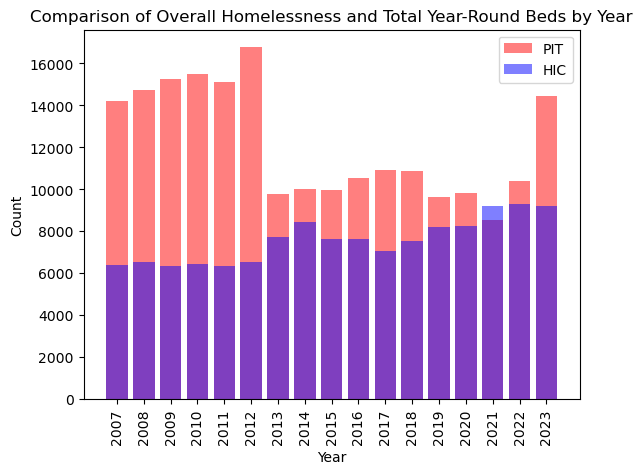

In [26]:
# Create a bar chart to compare HIC and PIT
years = pit_df.index
x_axis = np.arange(len(years))

plt.bar(x_axis, pit_df["Overall Homeless"], color='r', alpha=0.5, align="center")
plt.bar(x_axis, hic_df["Total Year-Round Beds (ES, TH, SH)"], color='b', alpha=0.5, align="center")
plt.xticks(x_axis, years, rotation="vertical") 

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Comparison of Overall Homelessness and Total Year-Round Beds by Year")

plt.savefig("../poverty_vis/hic_vs_pit_bar.png")
plt.legend(["PIT", "HIC"])
plt.show()


# Poverty Line vs SSS Data

In [27]:
# Display Poverty Line Data and SSS Data
hhs_df = raw_poverty_line_data_df[["Year", "4 People"]]
hhs_df.set_index("Year", inplace=True)
sss_df = raw_sss_data_df[["2 Adults + 2 School Age"]].groupby(raw_sss_data_df["Year"]).mean()

display(hhs_df)
display(sss_df)


,4 People
Year,
2010.0,22050.0
2011.0,22350.0
2012.0,23050.0
2013.0,23550.0
2014.0,23850.0
2015.0,24250.0
2016.0,24300.0
2017.0,24600.0
2018.0,25100.0


,2 Adults + 2 School Age
Year,
2011,46727.812500
2015,50792.406250
2018,58574.906250
2022,75624.546875


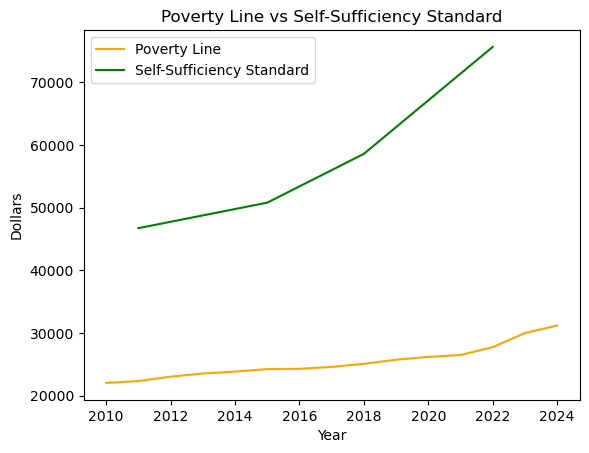

In [42]:
# Plot Poverty Line vs SSS
hhs_df["4 People"].plot(label="Poverty Line", color="orange")
sss_df["2 Adults + 2 School Age"].plot(label="Self-Sufficiency Standard", color="g")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Dollars")
plt.title("Poverty Line vs Self-Sufficiency Standard")

plt.savefig("../poverty_vis/poverty_sss.png")
plt.legend()
plt.show()


# Poverty Line vs SSS Bar Chart

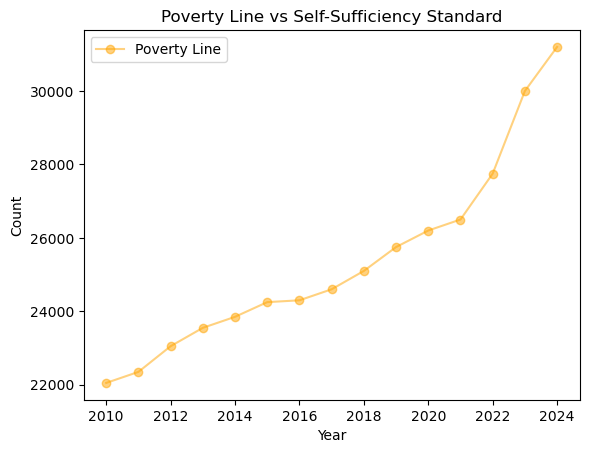

In [29]:
# Poverty Line vs SSS Bar Chart
# sss_df["2 Adults + 2 School Age"].plot(kind="bar", color="g", alpha=0.5, label="Self-Sufficiency Standard", width=0.4)
hhs_df["4 People"].plot(kind="line", marker="o", label="Poverty Line", color="orange", alpha=0.5)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Poverty Line vs Self-Sufficiency Standard")

plt.legend()
plt.savefig("../poverty_vis/poverty_sss_bar.png")
plt.show()


# SNAP Time Series

In [30]:
# Display data for SNAP Recipients
snap_df = raw_snap_data_df[["Date", "Recipients"]]
snap_df.set_index("Date", inplace=True)

# Change Recipients column to integer
snap_df['Recipients'] = snap_df['Recipients'].astype(int)

display(snap_df)


,Recipients
Date,
1/1/10,395580
2/1/10,398862
3/1/10,407731
4/1/10,411245
5/1/10,413805
...,...
2/1/22,521159
3/1/22,532046
4/1/22,541308


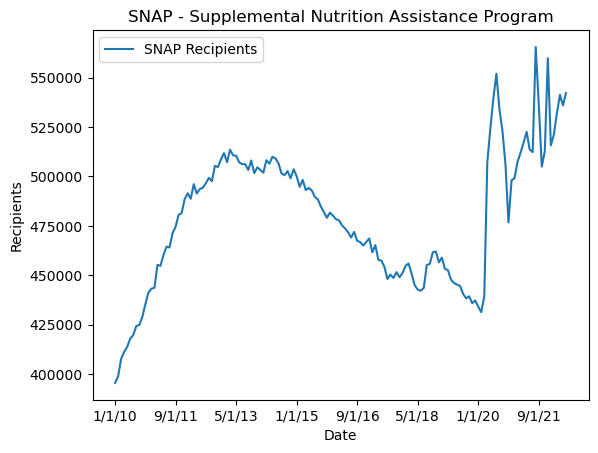

In [31]:
# Create a time series line chart of SNAP Recipients
snap_df["Recipients"].plot(label="SNAP Recipients")

plt.xlabel("Date")
plt.ylabel("Recipients")
plt.legend()
plt.title("SNAP - Supplemental Nutrition Assistance Program")
plt.savefig("../poverty_vis/snap.png")
plt.show()


# Prepare Data for Counties

In [32]:
# Create a new DataFrame with only the columns needed for analysis
income_county_df = census_df[["Year", "County", "Per Capita Income"]]
sss_county_df = raw_sss_data_df[["Year", "County", "1 Adult"]]

display(income_county_df.head())
display(sss_county_df.head())


,Year,County,Per Capita Income
0,2011,"Adams County, Colorado",24384.0
1,2012,"Adams County, Colorado",24357.0
2,2013,"Adams County, Colorado",24195.0
3,2014,"Adams County, Colorado",24667.0
4,2015,"Adams County, Colorado",25039.0


,Year,County,1 Adult
0,2011,Adams County,23143.618470
1,2011,Alamosa County,17991.556333
2,2011,Arapahoe County,22935.965145
3,2011,Archuleta County,19683.058172
4,2011,Baca County,17966.272969


# Per Capita Income for 5 Largest and Smallest Counties

In [33]:
# Display the per capita income for five largest and smallest counties.

# Combine Large Counties: Denver, El Paso, Jefferson, Adams, Arapahoe
census_large_county_df = income_county_df[income_county_df["County"].isin(["Denver County, Colorado", "El Paso County, Colorado", "Jefferson County, Colorado", "Adams County, Colorado", "Arapahoe County, Colorado"])]
census_large_county_df = census_large_county_df[["Year", "Per Capita Income"]]
census_large_county_df = census_large_county_df.groupby(census_large_county_df["Year"]).mean()

# Combine Small Counties: Hinsdale, San Juan, Mineral, Jackson, Kiowa
census_small_county_df = income_county_df[income_county_df["County"].isin(["Hinsdale County, Colorado", "San Juan County, Colorado", "Mineral County, Colorado", "Jackson County, Colorado", "Kiowa County, Colorado"])]
census_small_county_df = census_small_county_df[["Year", "Per Capita Income"]]
census_small_county_df = census_small_county_df.groupby(census_small_county_df["Year"]).mean()

display(census_large_county_df.head(30))
display(census_small_county_df.head(30))


,Per Capita Income
Year,
2011,30625.6
2012,30928.8
2013,30999.0
2014,31681.0
2015,32234.2
2016,33309.0
2017,34966.6
2018,36668.6
2019,38474.6


,Per Capita Income
Year,
2011,32686.6
2012,30295.8
2013,30349.8
2014,28853.6
2015,27979.8
2016,28565.2
2017,27880.2
2018,30667.2
2019,31232.6


# Self-Sufficiency Standard for Large and Small Counties

In [34]:
# Display the SSS 1 adult data for five largest and smallest counties.

# Large Counties: Denver, El Paso, Jefferson, Adams, Arapahoe
sss_large_county_df = sss_county_df[sss_county_df["County"].isin(["Denver County", "El Paso County", "Jefferson County", "Adams County", "Arapahoe County"])]
sss_large_county_df = sss_large_county_df[["Year", "1 Adult"]]
sss_large_county_df = sss_large_county_df.groupby(sss_large_county_df["Year"]).mean()

# Small Counties: Hinsdale, San Juan, Mineral, Jackson, Kiowa
sss_small_county_df = sss_county_df[sss_county_df["County"].isin(["Hinsdale County", "San Juan County", "Mineral County", "Jackson County", "Kiowa County"])]
sss_small_county_df = sss_small_county_df[["Year", "1 Adult"]]
sss_small_county_df = sss_small_county_df.groupby(sss_small_county_df["Year"]).mean()

display(sss_large_county_df.head())
display(sss_small_county_df.head())


,1 Adult
Year,
2011,21550.556627
2015,25596.976000
2018,26908.470000
2022,36236.344000


,1 Adult
Year,
2011,20395.556603
2015,20528.082000
2018,22991.902000
2022,29701.422000


# Line Chart of Per Capita Income for 5 Largest and Smallest Counties

Text(0.5, 1.0, 'Per Capita Income for Large and Small Counties')

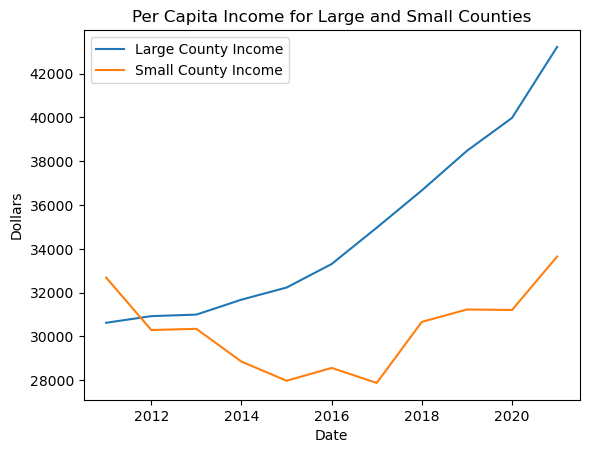

In [35]:
# Plot the per capita income for five largest and smallest counties.
census_large_county_df["Per Capita Income"].plot(label="Large County Income")
census_small_county_df["Per Capita Income"].plot(label="Small County Income")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Dollars")
plt.title("Per Capita Income for Large and Small Counties")


# Per Capita Income Compared to Self-Sufficiency Standard in Large Counties

Text(0.5, 1.0, 'Per Capita Income Compared to \nSelf-Sufficiency Standard in Large Counties')

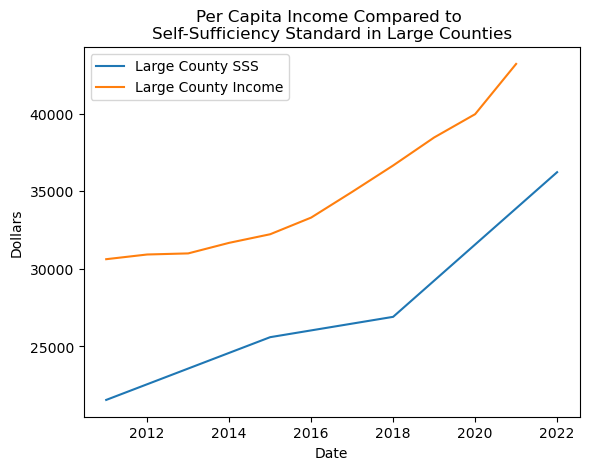

In [41]:
# Plot Per Capita Income Compared to Self-Sufficiency Standard in Large Counties
sss_large_county_df["1 Adult"].plot(label="Large County SSS")
census_large_county_df["Per Capita Income"].plot(label="Large County Income")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Dollars")
plt.title("Per Capita Income Compared to \nSelf-Sufficiency Standard in Large Counties")


# Per Capita Income Compared to Self-Sufficiency Standard in Small Counties

Text(0.5, 1.0, 'Per Capita Income Compared to \nSelf-Sufficiency Standard in Small Counties')

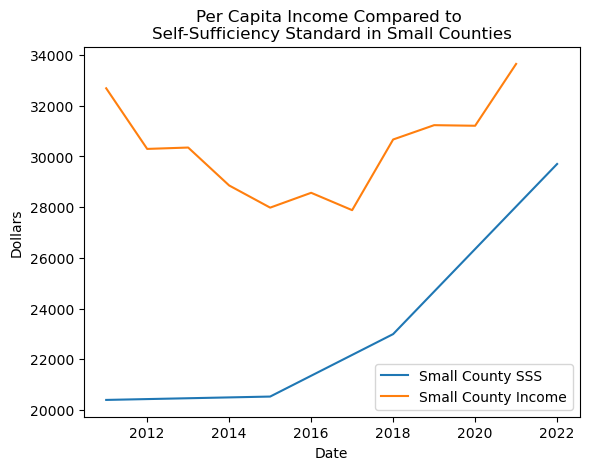

In [40]:
# Plot Per Capita Income Compared to Self-Sufficiency Standard in Small Counties
sss_small_county_df["1 Adult"].plot(label="Small County SSS")
census_small_county_df["Per Capita Income"].plot(label="Small County Income")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Dollars")
plt.title("Per Capita Income Compared to \nSelf-Sufficiency Standard in Small Counties")
